In [38]:
import pandas as pd
import numpy as np

In [39]:
columns = ['trade Id','price','qty','quoteQty','time','isBuyerMaker','isBestMatch']
qty =pd.read_csv("/Users/chris/Documents/Cloning/binance-public-data/python/data/spot/daily/trades/BTCUSDT/BTCUSDT-trades-2024-10-30.csv",names=columns,usecols=[1,2,5])
print(qty)


            price      qty  isBuyerMaker
0        72736.41  0.00013          True
1        72736.42  0.00286         False
2        72736.42  0.00120         False
3        72736.42  0.00286         False
4        72736.42  0.00009         False
...           ...      ...           ...
4040729  72344.75  0.00088         False
4040730  72344.75  0.00179         False
4040731  72344.75  0.00057         False
4040732  72344.75  0.00022         False
4040733  72344.74  0.00010          True

[4040734 rows x 3 columns]


In [40]:
qty['buyBTC'] = np.where(qty['isBuyerMaker']==False,qty['qty'],0)
qty['sellBTC'] = np.where(qty['isBuyerMaker']==True,qty['qty'],0)


sum_buyBTC = np.sum(qty['buyBTC'])
sum_sellBTC= np.sum(qty['sellBTC'])
net = sum_buyBTC- sum_sellBTC
data=[sum_buyBTC,sum_sellBTC]


In [41]:
import matplotlib.pyplot as plot


Text(0.5, 1.0, 'BTC buy sell 2024-10-30 24h')

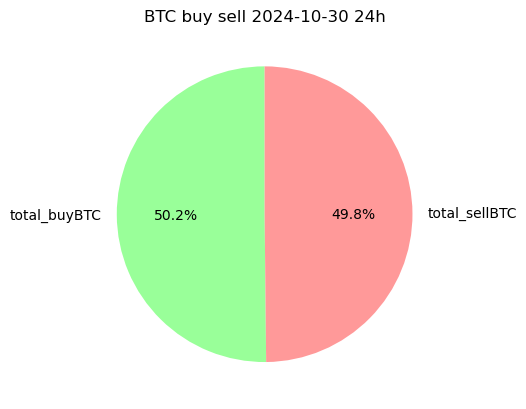

In [46]:
labels = ['total_buyBTC','total_sellBTC']
colors=['#99ff99','#ff9999']
sizes = [sum_buyBTC/(sum_buyBTC+sum_sellBTC),sum_sellBTC/(sum_buyBTC+sum_sellBTC)]

# Plotting the pie chart
plt.Figure(figsize=(6,6))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90)
plt.title("BTC buy sell 2024-10-30 24h")